Assignment Problem statement:
Load the given data into jupyter notebook (Local instance/Colab or similar)

1. Predict next 6 months sales at vehicle segment 1 or category name level.
Share the final notebook back in the teams
.ipynb format

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 3
%matplotlib inline

In [3]:
df = pd.read_excel('C:/Users/LENOVO/Downloads/New_folder/Vehicle_Sales_Data.xlsx')

In [4]:
df.head()

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
2,SKOAP3EEDI,OA,Octavia,SKODAAUTO INDIA PVT LTD,Premium Car 3,Executive,DIESEL,NOV,2012,0,0,0,PVPC,Passenger car PV,01-11-2012
3,HMORF2U4PT,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,PETROL,NOV,2012,0,6,0,PVUV,Utility vehicles PV,01-11-2012
4,FMTXF1U3PT,TX,Trax,FORCE MOTORS LTD,MPV,UV3,PETROL,MAY,2012,0,0,0,PVUV,Utility vehicles PV,01-05-2012


In [5]:
df['YrMth'] = pd.to_datetime(df['YrMth'], format = '%d-%m-%Y')

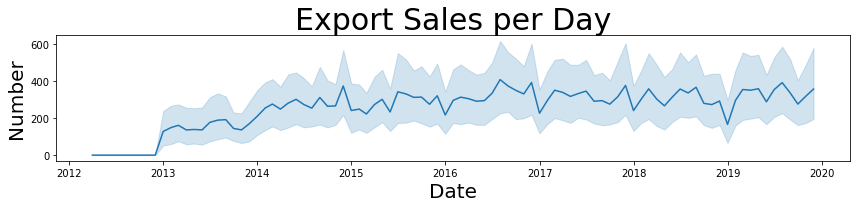

In [6]:
plt.figure(figsize=(12,3))
ax = sns.lineplot(x="YrMth", y="Export Sale", data=df)
ax.set_title('Export Sales per Day', fontsize=30)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number', fontsize=20)
plt.tight_layout()
plt.show()

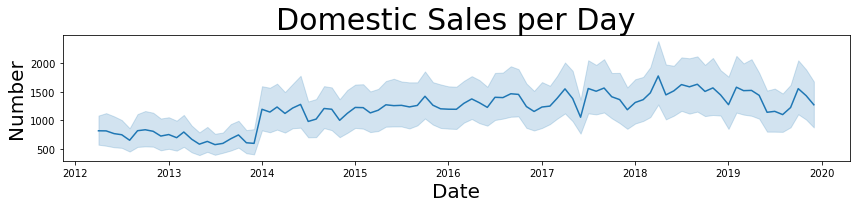

In [7]:
plt.figure(figsize=(12,3))
ax = sns.lineplot(x="YrMth", y="Domestic Sale", data=df)
ax.set_title('Domestic Sales per Day', fontsize=30)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number', fontsize=20)
plt.tight_layout()
plt.show()

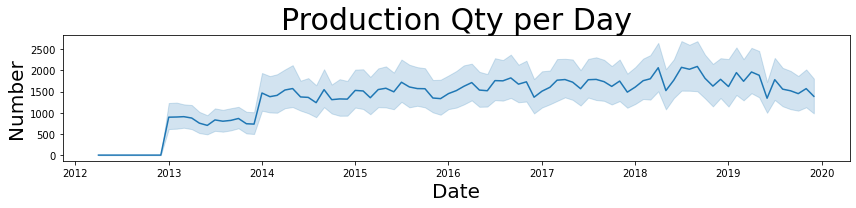

In [8]:
plt.figure(figsize=(12,3))
ax = sns.lineplot(x="YrMth", y="Production Qty", data=df)
ax.set_title('Production Qty per Day', fontsize=30)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number', fontsize=20)
plt.tight_layout()
plt.show()

In [9]:
df['Total Sale'] = df['Domestic Sale'] + df['Export Sale']

In [10]:
df.head(2)

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth,Total Sale
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,2012-11-01,0
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,2012-11-01,0


In [11]:
grouped_df = df.groupby(['Category','YrMth'])['Total Sale'].sum().reset_index(name='Total Sale')
grouped_df

,Category,YrMth,Total Sale
0,PVPC,2012-04-01,168351
1,PVPC,2012-05-01,163206
2,PVPC,2012-06-01,153453
3,PVPC,2012-07-01,141646
4,PVPC,2012-08-01,115834
...,...,...,...
274,PVVN,2019-08-01,9100
275,PVVN,2019-09-01,10371
276,PVVN,2019-10-01,10471
277,PVVN,2019-11-01,10671


In [12]:
display(grouped_df['Category'].unique())

array(['PVPC', 'PVUV', 'PVVN'], dtype=object)

In [36]:
display(grouped_df['Category'].value_counts())

PVPC    93
PVUV    93
PVVN    93
Name: Category, dtype: int64

#### Taking category as PVPC

In [13]:

indexedDataset = grouped_df[grouped_df['Category'] == 'PVPC']
indexedDataset.drop(['Category'], axis=1, inplace=True)
indexedDataset = indexedDataset.set_index(['YrMth'])
indexedDataset

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Total Sale
YrMth,
2012-04-01,168351
2012-05-01,163206
2012-06-01,153453
2012-07-01,141646
2012-08-01,115834
...,...
2019-08-01,160542
2019-09-01,167648
2019-10-01,194050


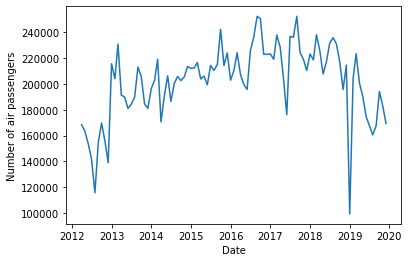

In [14]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

### Rolling Statistics

A rolling average gives easiest way to visualize the trending. As the given dataset provides counts by month, we use window size of 12 which will give us the annual rolling average.

We will also include the rolling standard deviation to see how much the data varies from the rolling average.

In [15]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()

display(rolmean)
display(rolstd)

,Total Sale
YrMth,
2012-04-01,NaN
2012-05-01,NaN
2012-06-01,NaN
2012-07-01,NaN
2012-08-01,NaN
...,...
2019-08-01,189831.333333
2019-09-01,184575.083333
2019-10-01,182660.333333


,Total Sale
YrMth,
2012-04-01,NaN
2012-05-01,NaN
2012-06-01,NaN
2012-07-01,NaN
2012-08-01,NaN
...,...
2019-08-01,35958.321412
2019-09-01,33993.907974
2019-10-01,32619.145957


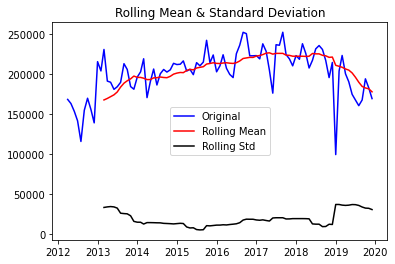

In [16]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

#### import require time series library

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from dateutil.parser import parse

### Augmented Dickey–Fuller Test

In [18]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Total Sale'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -4.705908
p-value                         0.000082
#Lags Used                      0.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


For a Time series to be stationary, its ADCF test should have:

1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value is very small very very closest to zero. Also critical values are close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is stationary

In [19]:
y = indexedDataset['Total Sale'].resample('MS').mean()
y.head()

YrMth
2012-04-01    168351.0
2012-05-01    163206.0
2012-06-01    153453.0
2012-07-01    141646.0
2012-08-01    115834.0
Freq: MS, Name: Total Sale, dtype: float64

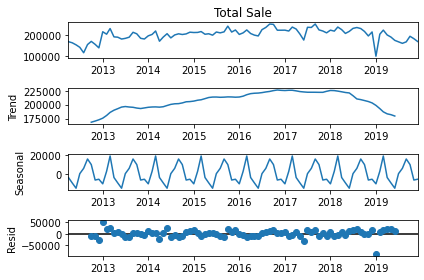

In [20]:
decomposition = seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

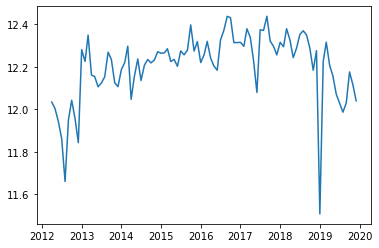

In [21]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [22]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['resid'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

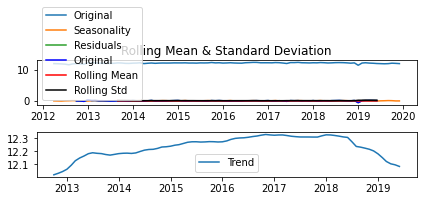

Results of Dickey Fuller Test:
Test Statistic                 -5.195509
p-value                         0.000009
#Lags Used                      8.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [23]:
decomposition = seasonal_decompose(indexedDataset_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

decomposedLogData = pd.DataFrame(residual)
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

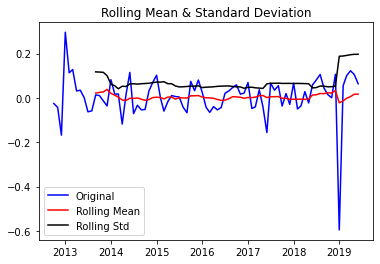

Results of Dickey Fuller Test:
Test Statistic                 -5.195509
p-value                         0.000009
#Lags Used                      8.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [24]:
decomposedLogData = pd.DataFrame(residual)
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

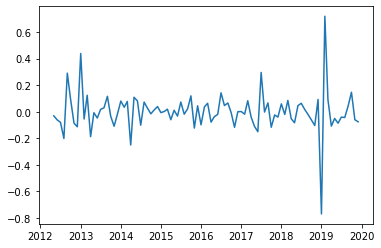

In [25]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

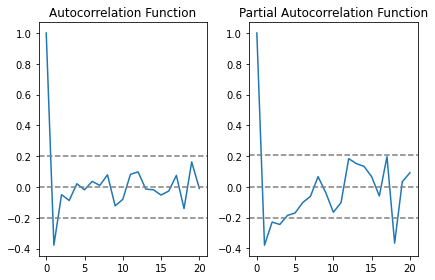

In [26]:
datasetLogDiffShifting.dropna(inplace=True)
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()   

From the ACF graph, we see that curve touches y=0.0 line at x=1. Thus, from theory, Q = 1 From the PACF graph, we see that curve touches y=0.0 line at x=1. Thus, from theory, P = 1
In this case, the above time series is already stationary, then d = 0.

#### ARIMA Model

In [27]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(indexedDataset['Total Sale'], 
                      start_p=1, 
                      start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      trace=False,
                      error_action='warn',
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1048.658
Date:                Thu, 10 Nov 2022   AIC                           2107.316
Time:                        13:46:14   BIC                           2119.925
Sample:                    04-01-2012   HQIC                          2112.405
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2658      0.103     12.314      0.000       1.064       1.467
ar.L2         -0.5317      0.078     -6.809      0.000      -0.685      -0.379
ma.L1         -1.7379      0.100    -17.391      0.0

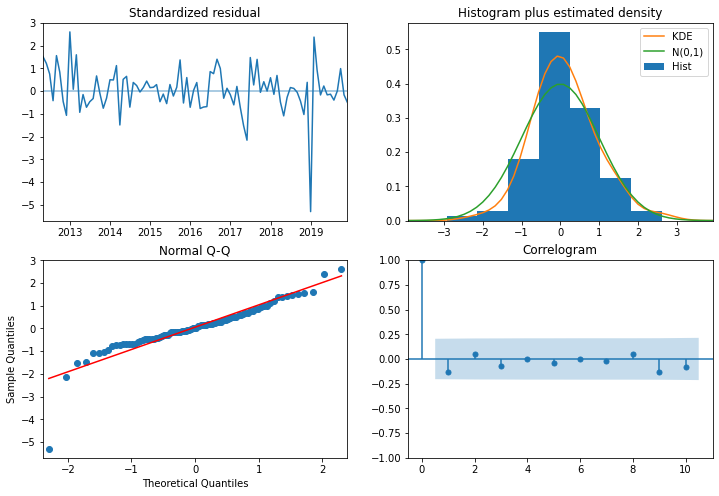

In [28]:
ARIMA_model.plot_diagnostics(figsize=(12,8))
plt.show()

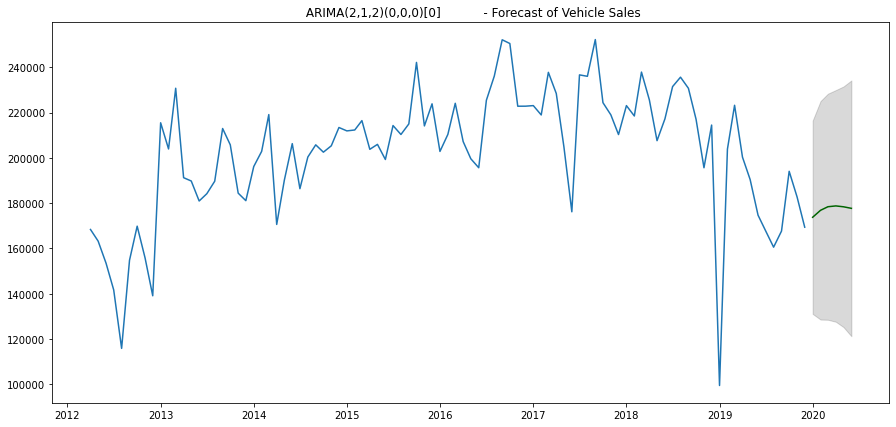

In [29]:
def forecast(ARIMA_model, n_periods=6):
    # Forecast
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(indexedDataset.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(indexedDataset['Total Sale'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title(f"{ARIMA_model} - Forecast of Vehicle Sales")
    plt.show()

forecast(ARIMA_model)

#### SARIMA Model

In [30]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(indexedDataset['Total Sale'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12,
                         start_P=0, 
                         seasonal=True,
                         d=None, 
                         D=1,
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [31]:
print(SARIMA_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   93
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -917.115
Date:                            Thu, 10 Nov 2022   AIC                           1844.229
Time:                                    13:46:17   BIC                           1856.139
Sample:                                04-01-2012   HQIC                          1849.004
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3175      0.052     -6.116      0.000      -0.419      -0.216
ar.S.L12       0.0689      0.238   

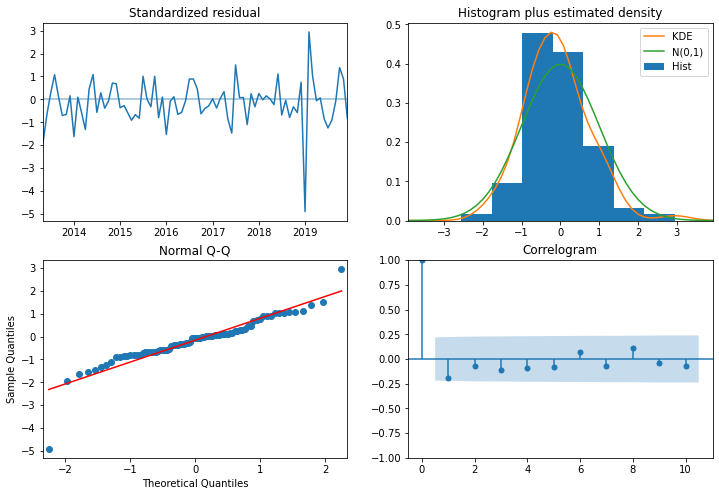

In [32]:
SARIMA_model.plot_diagnostics(figsize=(12,8))
plt.show()

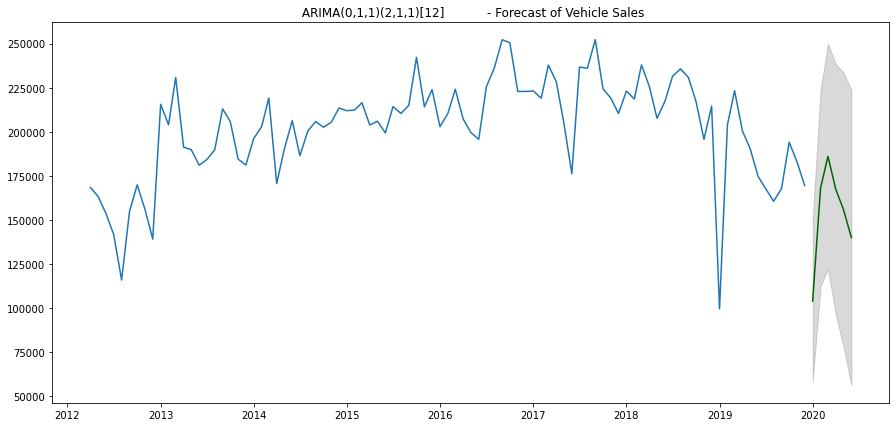

In [33]:
forecast(SARIMA_model)

#### SARIMAX Model

In [34]:
#adding exogenous variable
indexedDataset['month_index'] = indexedDataset.index.month

# SARIMAX Model
SARIMAX_model = pm.auto_arima(indexedDataset['Total Sale'], exogenous=indexedDataset[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   93
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -917.115
Date:                            Thu, 10 Nov 2022   AIC                           1844.229
Time:                                    13:46:21   BIC                           1856.139
Sample:                                04-01-2012   HQIC                          1849.004
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3175      0.052     -6.116      0.000      -0.419      -0.216
ar.S.L12       0.0689      0.238      0.290      0.772      -0.397       0.534
ar.S.L24      -0.2004      0.104     -1.921      0.055      -0.405       0.004
ma.S.L12      -0.4540      0.301     -1.509      0.131      -1.044       0.136
sigma2      5.498e+08   1.92e-09   2.86e+17      0.000     5.5e+08     5.5e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):               167.60
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -1.03
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.35e+32. Standard errors may be unstable.
"""

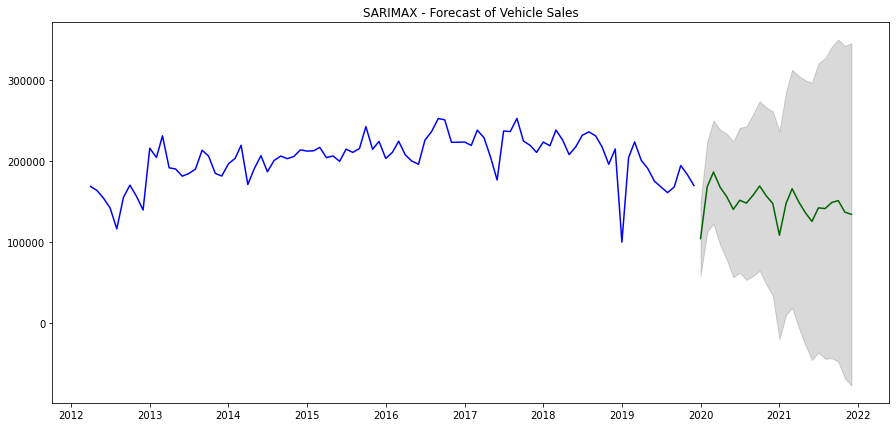

In [35]:
def sarimax_forecast(SARIMAX_model, n_periods=24):
    # Forecast
    forecast_df = pd.DataFrame({"month_index":pd.date_range(df.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(indexedDataset.index[-1]+ pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(indexedDataset.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(indexedDataset['Total Sale'], color='blue')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Vehicle Sales")
    plt.show()

sarimax_forecast(SARIMAX_model, n_periods=24)